In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"themohal","key":"3d77b537f9c711c2c289e88245c41dd3"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Dec 31 23:26 kaggle.json


In [3]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [4]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
arashnic/hr-analytics-job-change-of-data-scientists            HR Analytics: Job Change of Data Scientists        295KB  2020-12-07 00:25:10           1915  
utkarshxy/who-worldhealth-statistics-2020-complete             World Health 2020 🌏 | For Geospatial Analysis        1MB  2020-12-31 15:31:27             38  
babyoda/access-to-computers-from-home-oecd                     Access to Computers From Home OECD                   3KB  2020-12-04 10:50:09            183  
shashwatwork/impact-of-covid19-pandemic-on-the-global-economy  Impact of Covid-19 Pandemic on the Global Economy    1MB  2020-11-29 14:16:30           1077  
emmanuelleai/world-marathons-majors                 

In [6]:
# Copy the waste-pictures dataset data set locally.
!kaggle datasets download -d wangziang/waste-pictures

 99% 2.03G/2.05G [00:20<00:00, 85.8MB/s]
100% 2.05G/2.05G [00:20<00:00, 108MB/s] 


In [7]:
!mkdir waste-pictures #make new directory

In [8]:
!unzip waste-pictures.zip -d waste-pictures #unzip into new directory

Streaming output truncated to the last 5000 lines.
  inflating: waste-pictures/train/plasticbag/plasticbag (186).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (187).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (188).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (189).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (19).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (190).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (191).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (192).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (193).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (194).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (195).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (196).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (197).jpg  
  inflating: waste-pictures/train/plasticbag/plasticbag (198).jpg 

In [9]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

train_dir = pathlib.Path('/content/waste-pictures/train')
image_count = len(list(train_dir.glob('*/*.jpg')))
print(image_count)
fileList = train_dir.glob("*/*.png")
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)

# print(listdir)
!rm -rf '/content/waste-pictures/train/toothbrush/_taskdata'
!rm -rf '/content/waste-pictures/train/toothpastetube/_taskdata'
!rm -rf '/content/waste-pictures/train/cans/_taskdata'
!rm -rf '/content/waste-pictures/train/battery/_taskdata'

image_count = len(list(train_dir.glob('*/*.png')))
print(image_count)
builder = tfds.ImageFolder('/content/waste-pictures/')# Input datasets
print(builder.info)
# trains_ds = builder.as_dataset(split='train',batch_size=32, shuffle_files=True,as_supervised=True)
# print(train_ds)
# test_ds =  builder.as_dataset(split='test',batch_size=32, shuffle_files=True,as_supervised=True)
# print(builder.info.features["label"].names)
# numpy_ds = tfds.as_numpy(trains_ds)
# numpy_ds.
# numpy_images, numpy_labels = numpy_ds["image"], numpy_ds["label"]


17677
0
tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=34),
    }),
    total_num_examples=23542,
    splits={
        'test': 5756,
        'train': 17786,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)



In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.20,
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# train_ds = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(train_dir,target_size=(224,224),classes=train_ds.class_names,batch_size=32)

Found 17786 files belonging to 34 classes.
Using 14229 files for training.


In [13]:
# img,lables = next(train_ds)
test_dir = pathlib.Path('/content/waste-pictures/test')
image_count = len(list(test_dir.glob('*/*.jpg')))
print(image_count)
fileList = test_dir.glob("*/*.png")
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)

# print(listdir)
!rm -rf '/content/waste-pictures/test/toothbrush/_taskdata'
!rm -rf '/content/waste-pictures/test/toothpastetube/_taskdata'
!rm -rf '/content/waste-pictures/test/cans/_taskdata'
!rm -rf '/content/waste-pictures/test/battery/_taskdata'

image_count = len(list(test_dir.glob('*/*.png')))
print(image_count)


5337
0


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.20,
  subset="validation",
  seed = 100,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# test_ds = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(test_dir,target_size=(224,224),classes=val_ds.class_names,batch_size=32)

Found 17786 files belonging to 34 classes.
Using 3557 files for validation.


In [15]:
class_names = train_ds.class_names
print(class_names)
# test_class_names = test_ds.class_names
# print(test_class_name)
# (train_images, train_labels), (test_images, test_labels) = (train_ds,train_ds.class_names),(test_ds,test_val_ds.class_names)

['XLight', 'bandaid', 'battery', 'bowlsanddishes', 'bread', 'bulb', 'cans', 'carton', 'chopsticks', 'cigarettebutt', 'diapers', 'facialmask', 'glassbottle', 'leaflet', 'leftovers', 'medicinebottle', 'milkbox', 'nailpolishbottle', 'napkin', 'newspaper', 'nut', 'penholder', 'pesticidebottle', 'plasticbag', 'plasticbottle', 'plasticene', 'rag', 'tabletcapsule', 'thermometer', 'toothbrush', 'toothpastetube', 'toothpick', 'traditionalChinesemedicine', 'watermelonrind']


In [16]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [17]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


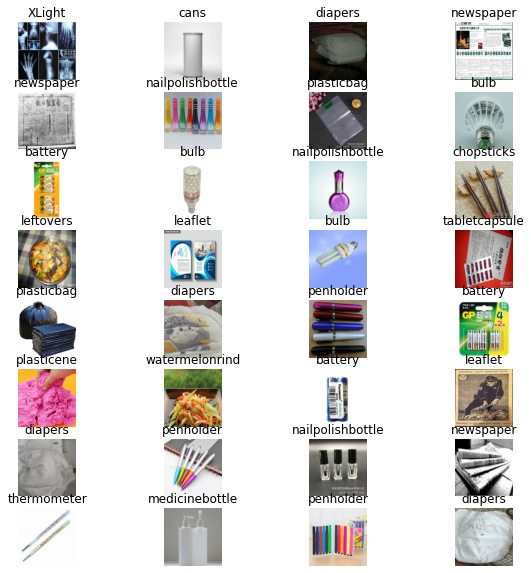

In [32]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8,4,i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [22]:
num_classes = 34
def create_model():
  model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
    ]) 
  return model

  # model.compile(
  # optimizer='adam',
  # loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  # metrics=['accuracy'])


In [ ]:
model = create_model()
model.summary()

In [ ]:
epochs=10
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# #step per epoch total training set/batch_size 17786/32
# history = model.fit(train_ds,steps_per_epoch=555,validation_data=val_ds,epochs=1,validation_steps=555)
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
445/445 [==============================] - 438s 982ms/step - loss: 3.2142 - accuracy: 0.1312 - val_loss: 2.5264 - val_accuracy: 0.3062
Epoch 2/10
445/445 [==============================] - 426s 958ms/step - loss: 2.3327 - accuracy: 0.3534 - val_loss: 2.1934 - val_accuracy: 0.3978
Epoch 3/10
445/445 [==============================] - 425s 956ms/step - loss: 1.7562 - accuracy: 0.5003 - val_loss: 2.0328 - val_accuracy: 0.4509
Epoch 4/10
445/445 [==============================] - 424s 954ms/step - loss: 1.2198 - accuracy: 0.6516 - val_loss: 2.1275 - val_accuracy: 0.4644
Epoch 5/10
445/445 [==============================] - 426s 957ms/step - loss: 0.7250 - accuracy: 0.7951 - val_loss: 2.4628 - val_accuracy: 0.4625
Epoch 6/10
445/445 [==============================] - 424s 953ms/step - loss: 0.3925 - accuracy: 0.8871 - val_loss: 3.0864 - val_accuracy: 0.4602
Epoch 7/10
445/445 [==============================] - 425s 955ms/step - loss: 0.2188 - accuracy: 0.9380 - val_loss: 3.7013 -

In [ ]:
#!rm -rf '/content/waste-pictures/'

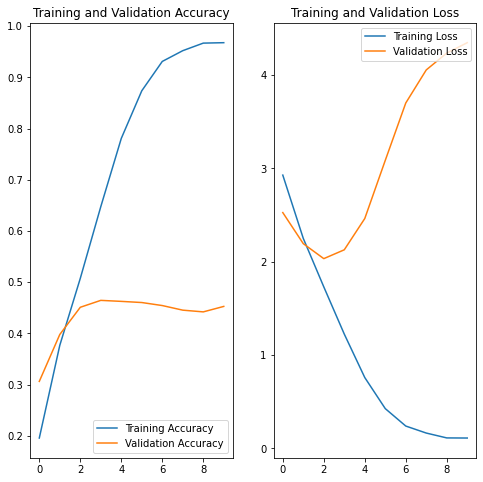

112/112 - 29s - loss: 4.3480 - accuracy: 0.4526

Test accuracy: 0.45262861251831055


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs) 

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('\nTest accuracy:', test_acc)

In [18]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

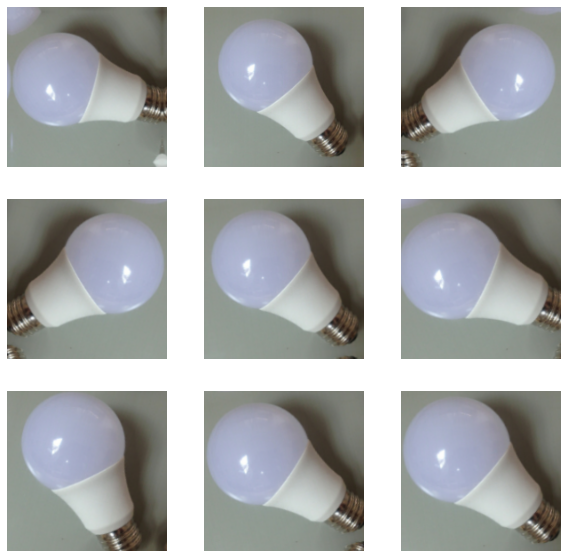

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [23]:

model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [26]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
445/445 [==============================] - 472s 1s/step - loss: 3.2091 - accuracy: 0.1203 - val_loss: 2.6145 - val_accuracy: 0.2806
Epoch 2/15
445/445 [==============================] - 463s 1s/step - loss: 2.5517 - accuracy: 0.2863 - val_loss: 2.3746 - val_accuracy: 0.3410
Epoch 3/15
445/445 [==============================] - 470s 1s/step - loss: 2.3014 - accuracy: 0.3550 - val_loss: 2.1692 - val_accuracy: 0.4043
Epoch 4/15
445/445 [==============================] - 464s 1s/step - loss: 2.1394 - accuracy: 0.3907 - val_loss: 2.1642 - val_accuracy: 0.4031
Epoch 5/15
445/445 [==============================] - 462s 1s/step - loss: 2.0206 - accuracy: 0.4310 - val_loss: 2.0927 - val_accuracy: 0.4217
Epoch 6/15
445/445 [==============================] - 465s 1s/step - loss: 1.9013 - accuracy: 0.4528 - val_loss: 2.0588 - val_accuracy: 0.4335
Epoch 7/15
445/445 [==============================] - 468s 1s/step - loss: 1.8278 - accuracy: 0.4770 - val_loss: 2.0213 - val_accuracy: 0.4436

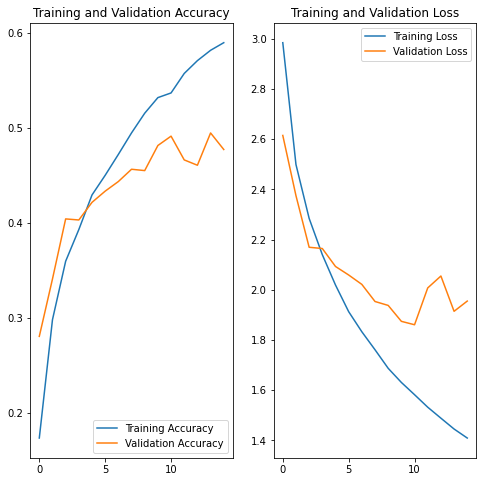

112/112 - 31s - loss: 1.9549 - accuracy: 0.4774

Test accuracy: 0.47736856341362


In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

print('\nTest accuracy:', test_acc)

This image most likely belongs to plasticbottle with a 66.93 percent confidence.


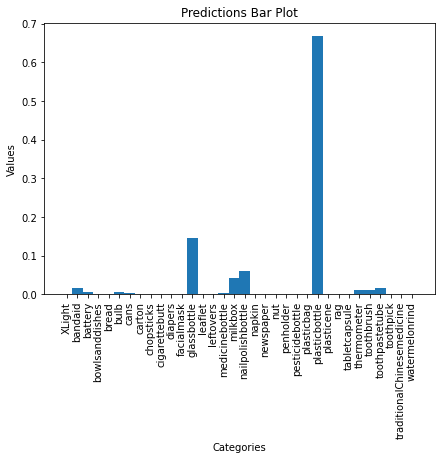

In [119]:
glass_url = "https://sc02.alicdn.com/kf/HTB1U6akaOzxK1RkSnaVq6xn9VXac.jpg_350x350.jpg"
glass_path = tf.keras.utils.get_file('glass_bottle', origin=glass_url)

img = tf.keras.preprocessing.image.load_img(
    glass_path, target_size=(img_height, img_width)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
# Simple Bar Plot
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.bar(class_names,score,align='center',width=1)
plt.xlabel('Categories')
plt.ylabel("Values")
plt.title('Predictions Bar Plot')
plt.show()